### Imports

In [16]:
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import PIL
from IPython.display import Image

### API Server

In [36]:
#apiServer = "http://localhost:8080/api/v1"
apiServer = "http://x570-test.local:8080/api/v1"

### Input Image

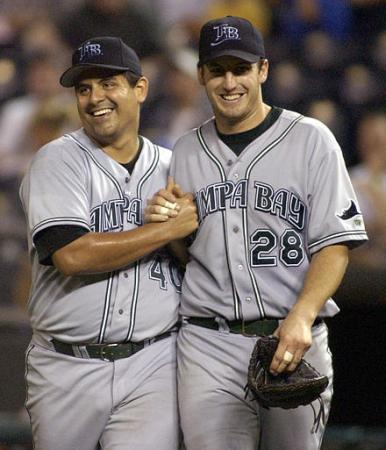

In [26]:
image = "sample_facedetect.jpg"
Image(filename=image)

### Classify Request (remote)

In [37]:
files = {'image': (image, open(image, 'rb') ) }
model = "densebox_320_320"

# make request
response = requests.post(apiServer + '/images/face-detect?model=' + model, files=files)
response.status_code

200

### Inspect results:

Pox: x=75 y=65 Size: w=57 h=70 Score: 0.997199
Pox: x=204 y=45 Size: w=55 h=73 Score: 0.994089


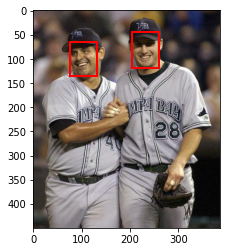

In [49]:
jsonResponse = json.loads(response.content)

for result in jsonResponse['data']['results']:
    print("Pox: x={} y={} Size: w={} h={} Score: {}".format(
        result['x'], result['y'], result['width'], result['height'], result['score']))
 
# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(PIL.Image.open(image))

# Create a Rectangle patch
for result in jsonResponse['data']['results']:
    ax.add_patch(patches.Rectangle(
        (result['x'], result['y']), result['width'], result['height'], linewidth=2, edgecolor='r', facecolor='none')) 

# Add the patch to the Axes
plt.show()